In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc


In [2]:
from pyspark.sql import HiveContext  

In [3]:
sc = SparkContext(appName="TwitterAnalysis")
sc.setLogLevel("ERROR")

In [4]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)
ssc.checkpoint( "checkpoint")

In [5]:
socket_stream = ssc.socketTextStream("172.31.38.183" ,5555)
lines = socket_stream.window(60)
#lines.pprint()

In [6]:
def parse(line):
    try:
        k, v = line.split(":")
        return [(k, v)]
    except:
        return []


In [7]:
from collections import namedtuple
column_lang = ("tweet_lang", "count" )
Tweet_Lang = namedtuple( 'Tweet_Lang', column_lang )

In [8]:
column_author = ("tweet_author_name", "count" )
Tweet_Author = namedtuple( 'Tweet_Author', column_author )

In [9]:
parsed = lines.flatMap(parse)  


#creating temp table for each winow for plotting and taking only 30 records
language_table = (parsed.transform(
   lambda rdd:rdd.map(lambda x:(x[1], 1)).reduceByKey(lambda a,b: a+b)).map( lambda tup: Tweet_Lang( tup[0], tup[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
              .limit(30).registerTempTable("tweets_lang") ))
    
parsed.pprint(20)



In [10]:

#author_table = (parsed.transform(
#   lambda rdd:rdd.map(lambda tup: Tweet_Author( tup[0], tup[1] ) )
#  .foreachRDD( lambda rdd: rdd.toDF() )
#              .limit(30).registerTempTable("tweets_author") ))

author_table = (parsed.transform(
   lambda rdd:rdd.map(lambda x:(x[0], 1)).reduceByKey(lambda a,b: a+b)).map( lambda tup: Tweet_Author( tup[0], tup[1] ) )
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") )
              .limit(30).registerTempTable("tweets_author") ))

In [11]:
ssc.start()

-------------------------------------------
Time: 2017-10-03 08:13:20
-------------------------------------------



In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [13]:
import time
from IPython import display

-------------------------------------------
Time: 2017-10-03 08:13:30
-------------------------------------------
(u'Puja Sharma', u'en')

-------------------------------------------
Time: 2017-10-03 08:13:40
-------------------------------------------
(u'Puja Sharma', u'en')

-------------------------------------------
Time: 2017-10-03 08:13:50
-------------------------------------------
(u'Puja Sharma', u'en')

-------------------------------------------
Time: 2017-10-03 08:14:00
-------------------------------------------
(u'Puja Sharma', u'en')
(u'Rajesh Singhvi', u'en')

-------------------------------------------
Time: 2017-10-03 08:14:10
-------------------------------------------
(u'Puja Sharma', u'en')
(u'Rajesh Singhvi', u'en')
(u'P J Anthony', u'en')



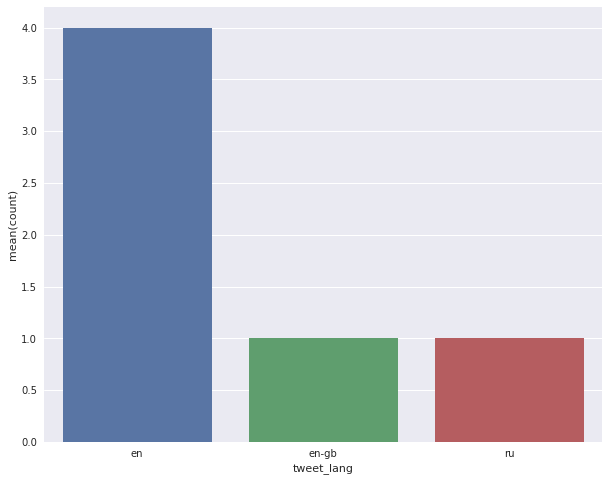

-------------------------------------------
Time: 2017-10-03 08:28:00
-------------------------------------------
(u'alok', u'en')
(u'satyanarayana', u'en')
(u'Shan Baba', u'en')
(u'ExpertJobsOrg', u'en')
(u'Olivia Hayes', u'ru')

-------------------------------------------
Time: 2017-10-03 08:28:10
-------------------------------------------
(u'satyanarayana', u'en')
(u'Shan Baba', u'en')
(u'ExpertJobsOrg', u'en')
(u'Olivia Hayes', u'ru')

-------------------------------------------
Time: 2017-10-03 08:28:20
-------------------------------------------
(u'ExpertJobsOrg', u'en')
(u'Olivia Hayes', u'ru')
(u'Anantha Subramanyam', u'en')

-------------------------------------------
Time: 2017-10-03 08:28:30
-------------------------------------------
(u'Olivia Hayes', u'ru')
(u'Anantha Subramanyam', u'en')
(u'Age-friendly Mcr', u'en')
(u'Fearless Jyoti', u'en')
(u'HinduNationalist#HDL', u'en')
(u'Riya P Sharma', u'en')

-------------------------------------------
Time: 2017-10-03 08:28:40


In [15]:

#bar plot 30 times after that it will not draw ()

count = 0
while count < 30:
    time.sleep( 20 )
    tweets_lang = sqlContext.sql( 'Select tweet_lang,count  from tweets_lang' )
    tweets_lang_df = tweets_lang.toPandas()
    display.clear_output(wait=True)
    sn.plt.figure( figsize = ( 10, 8 ) )
    sn.barplot( x="tweet_lang", y="count", data=tweets_lang_df)
#    sn.hist(top_10_df["tweet_lang"])
    sn.plt.show()
    count = count + 1

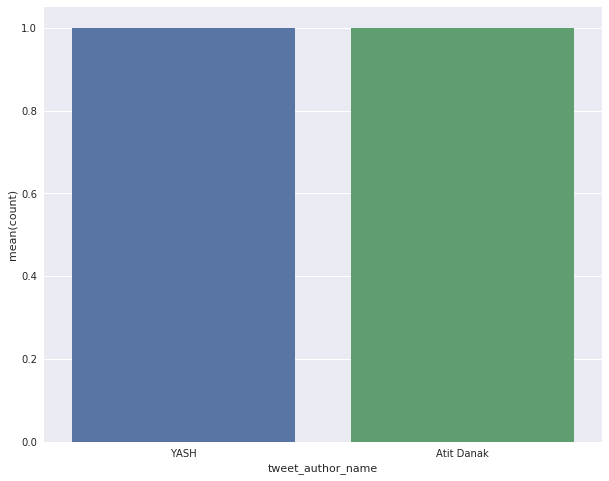

In [14]:
count = 0
while count < 30:
    time.sleep( 20 )
    tweets_Author = sqlContext.sql( 'Select tweet_author_name,count  from tweets_author' )
    tweets_Author_df = tweets_Author.toPandas()
    display.clear_output(wait=True)
    sn.plt.figure( figsize = ( 10, 8 ) )
    sn.barplot( x="tweet_author_name", y="count", data=tweets_Author_df)
#    sn.distplot(top_10_df.tweet_author_name)
    sn.plt.show()
    count = count + 1

In [16]:
ssc.stop()